In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_get_back=pd.read_table(r'C:\Users\RT009223\TestriteGroup\滲透率專案\02_adjusted data\1A39會員位置(無正確地址的資料)_一般卡_All.txt',sep=',')
print(df_get_back.shape)

(10508, 4)


In [4]:
result=pd.read_table(r'C:\Users\RT009223\TestriteGroup\滲透率專案\02_adjusted data\1A39會員位置(經整理_配對村里)_一般卡_All.txt',sep=',')
print(result.shape)

(72157, 7)


In [5]:
df_get_back=df_get_back[-df_get_back.id.isin(result.id)]
print(df_get_back.shape)
result=pd.concat([result,df_get_back]).reset_index(drop=True)
print(result.shape)

(10508, 4)
(82665, 7)


In [6]:
result.head(2)

,id,addr,lon,lat,縣市,行政區,村里
0,20091208000164,臺中市南屯區大誠里2鄰五權西路二段8號 ...,120.654207,24.140348,台中市,南屯區,大誠里
1,20070915000091,南投縣集集鎮田寮里10鄰龍泉巷19之12號 ...,120.750666,23.835552,南投縣,集集鎮,田寮里


In [7]:
df01=pd.read_csv(r'Y:\Gallon\05_分析組專案\01_大墩店分析_20210309\1A39_來客_by月.csv',error_bad_lines=False,header=None)

In [8]:
df01.columns=['year','month','id']
print(df01.shape)
df01.head(2)

(140186, 3)


,year,month,id
0,2019,4,20190324000855
1,2020,7,20020927000308


In [9]:
df01.id.isin(result.id).sum()==df01.shape[0]

True

In [10]:
df02=df01.groupby(['year','month'])['id'].count().reset_index(name='n')
df02.head()

,year,month,n
0,2019,1,5751
1,2019,2,5971
2,2019,3,6779
3,2019,4,5107
4,2019,5,4732


In [11]:
import datetime

In [12]:
df02['time']=df02.year.astype('str')+'-'+df02.month.astype('str').str.zfill(2)

In [13]:
df02

,year,month,n,time
0,2019,1,5751,2019-01
1,2019,2,5971,2019-02
2,2019,3,6779,2019-03
3,2019,4,5107,2019-04
4,2019,5,4732,2019-05
5,2019,6,5244,2019-06
6,2019,7,5132,2019-07
7,2019,8,5660,2019-08
8,2019,9,4916,2019-09
9,2019,10,4857,2019-10


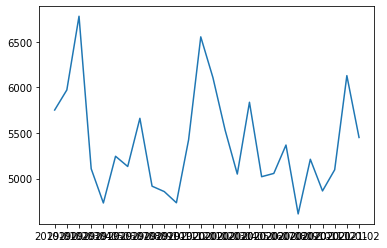

In [14]:
plt.plot(df02.time,df02.n)

In [15]:
df03=df01.copy()
df03=df03.loc[((df03['year'].isin([2019]) & df03['month'].isin([8])) |\
          (df03['year'].isin([2019]) & df03['month'].isin([6,7]))),['id']].reset_index(drop=True)

print(df03.shape)
df03=df03.drop_duplicates(subset=['id']).reset_index(drop=True)
print(df03.shape)
df03.head(2)

df03=pd.merge(df03,result,on='id')
df03.loc[df03['縣市'].isna(),['縣市']]='NA'
df03.loc[df03['行政區'].isna(),['行政區']]='NA'
df03.loc[df03['村里'].isna(),['村里']]='NA'
df03.head(2)

df_sp_01=df03.copy()
df_sp_02=df_sp_01.groupby(['縣市','行政區','村里'])['id'].count().reset_index(name='n')
print(df_sp_01.shape[0])
print(df_sp_02.n.sum())
df_sp_02['c_list']=df_sp_02['縣市']
df_sp_02['t_list']=df_sp_02['縣市']+df_sp_02['行政區']
df_sp_02.head(2)

if (df_sp_02['縣市']=='NA').sum()>0:
    c_rate=df_sp_02.loc[(df_sp_02['縣市']=='NA'),'n'].values[0]/df_sp_02.n.sum()
    print('c_rate',c_rate)
    df_sp_02['n']=df_sp_02['n']/(1-c_rate)
    print(df_sp_02.head(2))
    df_sp_02=df_sp_02.loc[-(df_sp_02['縣市']=='NA'),:].reset_index(drop=True)
    print(df_sp_02.head(2))
    df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
    print(df_sp_02.n.sum())
else:
    print('沒有縣市NA值')
    
if (df_sp_02['行政區']=='NA').sum()>0:
    c_list=df_sp_02.loc[(df_sp_02['行政區']=='NA'),:]['c_list'].unique()
    for c in c_list:
        t_rate=df_sp_02.loc[(df_sp_02['c_list']==c)&(df_sp_02['村里']=='NA'),'n'].values[0]/df_sp_02.loc[(df_sp_02['c_list']==c),'n'].sum()
#        print(c,t_rate)
        df_sp_02.loc[(df_sp_02['c_list']==c)&-(df_sp_02['村里']=='NA'),'n']=df_sp_02.loc[(df_sp_02['c_list']==c)&-(df_sp_02['村里']=='NA'),'n']/(1-t_rate)
        df_sp_02=df_sp_02.loc[-((df_sp_02['c_list']==c)&(df_sp_02['村里']=='NA')),:].reset_index(drop=True)
        df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
        print(df_sp_02.n.sum())
else:
    print('沒有行政區NA值')
    
print(df_sp_02.n.sum())
df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
print(df_sp_02.n.sum())

if (df_sp_02['村里']=='NA').sum()>0:
    t_list=df_sp_02.loc[(df_sp_02['村里']=='NA'),:]['t_list'].unique()
    for t in t_list:
        v_rate=df_sp_02.loc[(df_sp_02['t_list']==t)&(df_sp_02['村里']=='NA'),'n'].values[0]/df_sp_02.loc[(df_sp_02['t_list']==t),'n'].sum()
#        print(t,v_rate)
        df_sp_02.loc[(df_sp_02['t_list']==t)&-(df_sp_02['村里']=='NA'),'n']=df_sp_02.loc[(df_sp_02['t_list']==t)&-(df_sp_02['村里']=='NA'),'n']/(1-v_rate)
        df_sp_02=df_sp_02.loc[-((df_sp_02['t_list']==t)&(df_sp_02['村里']=='NA')),:].reset_index(drop=True)
else:
    print('沒有村里NA值')
    
print(df_sp_02.n.sum())
df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
print(df_sp_02.n.sum())

df_sp_02=df_sp_02.loc[:,['縣市','行政區','村里','n']]
df_sp_02.columns=['縣市','行政區','村里','n_past_ori']
df_sp_02.head(2)

(16036, 1)
(14518, 1)
14518
14518
c_rate 0.03629976580796253
    縣市  行政區   村里           n c_list  t_list
0   NA   NA   NA  546.850547     NA    NANA
1  南投縣  中寮鄉  義和村    1.037667    南投縣  南投縣中寮鄉
    縣市  行政區   村里         n c_list  t_list
0  南投縣  中寮鄉  義和村  1.037667    南投縣  南投縣中寮鄉
1  南投縣  仁愛鄉  大同村  3.113001    南投縣  南投縣仁愛鄉
14517.999999999996
沒有行政區NA值
14517.999999999996
14518.000000000002
14508.6609963548
14518.0


,縣市,行政區,村里,n_past_ori
0,南投縣,中寮鄉,義和村,1.038335
1,南投縣,仁愛鄉,大同村,3.115005


In [16]:
df_past_ori=df_sp_02.copy()

In [17]:
df03=df01.copy()
df03=df03.loc[((df03['year'].isin([2019]) & df03['month'].isin([12])) |\
          (df03['year'].isin([2020]) & df03['month'].isin([1,2]))),['id']].reset_index(drop=True)

print(df03.shape)
df03=df03.drop_duplicates(subset=['id']).reset_index(drop=True)
print(df03.shape)
df03.head(2)

df03=pd.merge(df03,result,on='id')
df03.loc[df03['縣市'].isna(),['縣市']]='NA'
df03.loc[df03['行政區'].isna(),['行政區']]='NA'
df03.loc[df03['村里'].isna(),['村里']]='NA'
df03.head(2)

df_sp_01=df03.copy()
df_sp_02=df_sp_01.groupby(['縣市','行政區','村里'])['id'].count().reset_index(name='n')
print(df_sp_01.shape[0])
print(df_sp_02.n.sum())
df_sp_02['c_list']=df_sp_02['縣市']
df_sp_02['t_list']=df_sp_02['縣市']+df_sp_02['行政區']
df_sp_02.head(2)

if (df_sp_02['縣市']=='NA').sum()>0:
    c_rate=df_sp_02.loc[(df_sp_02['縣市']=='NA'),'n'].values[0]/df_sp_02.n.sum()
    print('c_rate',c_rate)
    df_sp_02['n']=df_sp_02['n']/(1-c_rate)
    print(df_sp_02.head(2))
    df_sp_02=df_sp_02.loc[-(df_sp_02['縣市']=='NA'),:].reset_index(drop=True)
    print(df_sp_02.head(2))
    df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
    print(df_sp_02.n.sum())
else:
    print('沒有縣市NA值')
    
if (df_sp_02['行政區']=='NA').sum()>0:
    c_list=df_sp_02.loc[(df_sp_02['行政區']=='NA'),:]['c_list'].unique()
    for c in c_list:
        t_rate=df_sp_02.loc[(df_sp_02['c_list']==c)&(df_sp_02['村里']=='NA'),'n'].values[0]/df_sp_02.loc[(df_sp_02['c_list']==c),'n'].sum()
#        print(c,t_rate)
        df_sp_02.loc[(df_sp_02['c_list']==c)&-(df_sp_02['村里']=='NA'),'n']=df_sp_02.loc[(df_sp_02['c_list']==c)&-(df_sp_02['村里']=='NA'),'n']/(1-t_rate)
        df_sp_02=df_sp_02.loc[-((df_sp_02['c_list']==c)&(df_sp_02['村里']=='NA')),:].reset_index(drop=True)
        df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
        print(df_sp_02.n.sum())
else:
    print('沒有行政區NA值')
    
print(df_sp_02.n.sum())
df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
print(df_sp_02.n.sum())

if (df_sp_02['村里']=='NA').sum()>0:
    t_list=df_sp_02.loc[(df_sp_02['村里']=='NA'),:]['t_list'].unique()
    for t in t_list:
        v_rate=df_sp_02.loc[(df_sp_02['t_list']==t)&(df_sp_02['村里']=='NA'),'n'].values[0]/df_sp_02.loc[(df_sp_02['t_list']==t),'n'].sum()
#        print(t,v_rate)
        df_sp_02.loc[(df_sp_02['t_list']==t)&-(df_sp_02['村里']=='NA'),'n']=df_sp_02.loc[(df_sp_02['t_list']==t)&-(df_sp_02['村里']=='NA'),'n']/(1-v_rate)
        df_sp_02=df_sp_02.loc[-((df_sp_02['t_list']==t)&(df_sp_02['村里']=='NA')),:].reset_index(drop=True)
else:
    print('沒有村里NA值')
    
print(df_sp_02.n.sum())
df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
print(df_sp_02.n.sum())

df_sp_02=df_sp_02.loc[:,['縣市','行政區','村里','n']]
df_sp_02.columns=['縣市','行政區','村里','n_past_new']
df_sp_02.head(2)

(18083, 1)
(15773, 1)
15773
15773
c_rate 0.049705192417422175
    縣市  行政區  村里           n c_list  t_list
0   NA   NA  NA  825.007139     NA    NANA
1  南投縣  中寮鄉  NA    1.052305    南投縣  南投縣中寮鄉
    縣市  行政區   村里         n c_list  t_list
0  南投縣  中寮鄉   NA  1.052305    南投縣  南投縣中寮鄉
1  南投縣  中寮鄉  廣興村  1.052305    南投縣  南投縣中寮鄉
15772.999999999996
沒有行政區NA值
15772.999999999996
15773.000000000004
15765.633864834212
15773.000000000004


,縣市,行政區,村里,n_past_new
0,南投縣,中寮鄉,廣興村,1.403729
1,南投縣,中寮鄉,永平村,1.403729


In [18]:
df_past_new=df_sp_02.copy()

In [19]:
df03=df01.copy()
df03=df03.loc[((df03['year'].isin([2020]) & df03['month'].isin([8])) |\
          (df03['year'].isin([2020]) & df03['month'].isin([6,7]))),['id']].reset_index(drop=True)

print(df03.shape)
df03=df03.drop_duplicates(subset=['id']).reset_index(drop=True)
print(df03.shape)
df03.head(2)

df03=pd.merge(df03,result,on='id')
df03.loc[df03['縣市'].isna(),['縣市']]='NA'
df03.loc[df03['行政區'].isna(),['行政區']]='NA'
df03.loc[df03['村里'].isna(),['村里']]='NA'
df03.head(2)

df_sp_01=df03.copy()
df_sp_02=df_sp_01.groupby(['縣市','行政區','村里'])['id'].count().reset_index(name='n')
print(df_sp_01.shape[0])
print(df_sp_02.n.sum())
df_sp_02['c_list']=df_sp_02['縣市']
df_sp_02['t_list']=df_sp_02['縣市']+df_sp_02['行政區']
df_sp_02.head(2)

if (df_sp_02['縣市']=='NA').sum()>0:
    c_rate=df_sp_02.loc[(df_sp_02['縣市']=='NA'),'n'].values[0]/df_sp_02.n.sum()
    print('c_rate',c_rate)
    df_sp_02['n']=df_sp_02['n']/(1-c_rate)
    print(df_sp_02.head(2))
    df_sp_02=df_sp_02.loc[-(df_sp_02['縣市']=='NA'),:].reset_index(drop=True)
    print(df_sp_02.head(2))
    df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
    print(df_sp_02.n.sum())
else:
    print('沒有縣市NA值')
    
if (df_sp_02['行政區']=='NA').sum()>0:
    c_list=df_sp_02.loc[(df_sp_02['行政區']=='NA'),:]['c_list'].unique()
    for c in c_list:
        t_rate=df_sp_02.loc[(df_sp_02['c_list']==c)&(df_sp_02['村里']=='NA'),'n'].values[0]/df_sp_02.loc[(df_sp_02['c_list']==c),'n'].sum()
#        print(c,t_rate)
        df_sp_02.loc[(df_sp_02['c_list']==c)&-(df_sp_02['村里']=='NA'),'n']=df_sp_02.loc[(df_sp_02['c_list']==c)&-(df_sp_02['村里']=='NA'),'n']/(1-t_rate)
        df_sp_02=df_sp_02.loc[-((df_sp_02['c_list']==c)&(df_sp_02['村里']=='NA')),:].reset_index(drop=True)
        df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
        print(df_sp_02.n.sum())
else:
    print('沒有行政區NA值')
    
print(df_sp_02.n.sum())
df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
print(df_sp_02.n.sum())

if (df_sp_02['村里']=='NA').sum()>0:
    t_list=df_sp_02.loc[(df_sp_02['村里']=='NA'),:]['t_list'].unique()
    for t in t_list:
        v_rate=df_sp_02.loc[(df_sp_02['t_list']==t)&(df_sp_02['村里']=='NA'),'n'].values[0]/df_sp_02.loc[(df_sp_02['t_list']==t),'n'].sum()
#        print(t,v_rate)
        df_sp_02.loc[(df_sp_02['t_list']==t)&-(df_sp_02['村里']=='NA'),'n']=df_sp_02.loc[(df_sp_02['t_list']==t)&-(df_sp_02['村里']=='NA'),'n']/(1-v_rate)
        df_sp_02=df_sp_02.loc[-((df_sp_02['t_list']==t)&(df_sp_02['村里']=='NA')),:].reset_index(drop=True)
else:
    print('沒有村里NA值')
    
print(df_sp_02.n.sum())
df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
print(df_sp_02.n.sum())

df_sp_02=df_sp_02.loc[:,['縣市','行政區','村里','n']]
df_sp_02.columns=['縣市','行政區','村里','n_now_ori']
df_sp_02.head(2)

(15443, 1)
(13733, 1)
13733
13733
c_rate 0.08832738658705308
    縣市  行政區  村里            n c_list  t_list
0   NA   NA  NA  1330.521486     NA    NANA
1  南投縣  中寮鄉  NA     1.096885    南投縣  南投縣中寮鄉
    縣市  行政區  村里         n c_list  t_list
0  南投縣  中寮鄉  NA  1.096885    南投縣  南投縣中寮鄉
1  南投縣  仁愛鄉  NA  1.096885    南投縣  南投縣仁愛鄉
13733.0
沒有行政區NA值
13733.0
13733.0
13718.740495207669
13733.0


,縣市,行政區,村里,n_now_ori
0,南投縣,仁愛鄉,南豐村,2.63526
1,南投縣,仁愛鄉,大同村,3.95289


In [20]:
df_now_ori=df_sp_02.copy()

In [21]:
df03=df01.copy()
df03=df03.loc[((df03['year'].isin([2020]) & df03['month'].isin([12])) |\
          (df03['year'].isin([2021]) & df03['month'].isin([1,2]))),['id']].reset_index(drop=True)

print(df03.shape)
df03=df03.drop_duplicates(subset=['id']).reset_index(drop=True)
print(df03.shape)
df03.head(2)

df03=pd.merge(df03,result,on='id')
df03.loc[df03['縣市'].isna(),['縣市']]='NA'
df03.loc[df03['行政區'].isna(),['行政區']]='NA'
df03.loc[df03['村里'].isna(),['村里']]='NA'
df03.head(2)

df_sp_01=df03.copy()
df_sp_02=df_sp_01.groupby(['縣市','行政區','村里'])['id'].count().reset_index(name='n')
print(df_sp_01.shape[0])
print(df_sp_02.n.sum())
df_sp_02['c_list']=df_sp_02['縣市']
df_sp_02['t_list']=df_sp_02['縣市']+df_sp_02['行政區']
df_sp_02.head(2)

if (df_sp_02['縣市']=='NA').sum()>0:
    c_rate=df_sp_02.loc[(df_sp_02['縣市']=='NA'),'n'].values[0]/df_sp_02.n.sum()
    print('c_rate',c_rate)
    df_sp_02['n']=df_sp_02['n']/(1-c_rate)
    print(df_sp_02.head(2))
    df_sp_02=df_sp_02.loc[-(df_sp_02['縣市']=='NA'),:].reset_index(drop=True)
    print(df_sp_02.head(2))
    df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
    print(df_sp_02.n.sum())
else:
    print('沒有縣市NA值')
    
if (df_sp_02['行政區']=='NA').sum()>0:
    c_list=df_sp_02.loc[(df_sp_02['行政區']=='NA'),:]['c_list'].unique()
    for c in c_list:
        t_rate=df_sp_02.loc[(df_sp_02['c_list']==c)&(df_sp_02['村里']=='NA'),'n'].values[0]/df_sp_02.loc[(df_sp_02['c_list']==c),'n'].sum()
#        print(c,t_rate)
        df_sp_02.loc[(df_sp_02['c_list']==c)&-(df_sp_02['村里']=='NA'),'n']=df_sp_02.loc[(df_sp_02['c_list']==c)&-(df_sp_02['村里']=='NA'),'n']/(1-t_rate)
        df_sp_02=df_sp_02.loc[-((df_sp_02['c_list']==c)&(df_sp_02['村里']=='NA')),:].reset_index(drop=True)
        df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
        print(df_sp_02.n.sum())
else:
    print('沒有行政區NA值')
    
print(df_sp_02.n.sum())
df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
print(df_sp_02.n.sum())

if (df_sp_02['村里']=='NA').sum()>0:
    t_list=df_sp_02.loc[(df_sp_02['村里']=='NA'),:]['t_list'].unique()
    for t in t_list:
        v_rate=df_sp_02.loc[(df_sp_02['t_list']==t)&(df_sp_02['村里']=='NA'),'n'].values[0]/df_sp_02.loc[(df_sp_02['t_list']==t),'n'].sum()
#        print(t,v_rate)
        df_sp_02.loc[(df_sp_02['t_list']==t)&-(df_sp_02['村里']=='NA'),'n']=df_sp_02.loc[(df_sp_02['t_list']==t)&-(df_sp_02['村里']=='NA'),'n']/(1-v_rate)
        df_sp_02=df_sp_02.loc[-((df_sp_02['t_list']==t)&(df_sp_02['村里']=='NA')),:].reset_index(drop=True)
else:
    print('沒有村里NA值')
    
print(df_sp_02.n.sum())
df_sp_02.n=df_sp_02.n/(df_sp_02.n.sum()/df_sp_01.shape[0])
print(df_sp_02.n.sum())

df_sp_02=df_sp_02.loc[:,['縣市','行政區','村里','n']]
df_sp_02.columns=['縣市','行政區','村里','n_now_new']
df_sp_02.head(2)

(16674, 1)
(14521, 1)
14521
14521
c_rate 0.09765167688175745
    縣市  行政區   村里            n c_list  t_list
0   NA   NA   NA  1571.455239     NA    NANA
1  南投縣  中寮鄉  永平村     1.108219    南投縣  南投縣中寮鄉
    縣市  行政區   村里         n c_list  t_list
0  南投縣  中寮鄉  永平村  1.108219    南投縣  南投縣中寮鄉
1  南投縣  中寮鄉  義和村  1.108219    南投縣  南投縣中寮鄉
14521.0
沒有行政區NA值
14521.0
14521.0
14512.134244066245
14521.0


,縣市,行政區,村里,n_now_new
0,南投縣,中寮鄉,永平村,1.108897
1,南投縣,中寮鄉,義和村,1.108897


In [22]:
df_now_new=df_sp_02.copy()

In [25]:
df03=pd.merge(df_past_ori,df_past_new,how='outer')
print(df03.shape)
df03=pd.merge(df03,df_now_ori,how='outer')
print(df03.shape)
df03=pd.merge(df03,df_now_new,how='outer')
print(df03.shape)
df03.head(3)

(3249, 5)
(3824, 6)
(4193, 7)


,縣市,行政區,村里,n_past_ori,n_past_new,n_now_ori,n_now_new
0,南投縣,中寮鄉,義和村,1.038335,1.403729,NaN,1.108897
1,南投縣,仁愛鄉,大同村,3.115005,6.316780,3.95289,5.544483
2,南投縣,信義鄉,地利村,1.038335,NaN,NaN,NaN


In [26]:
df03=df03.fillna(0)
df03.head(3)

,縣市,行政區,村里,n_past_ori,n_past_new,n_now_ori,n_now_new
0,南投縣,中寮鄉,義和村,1.038335,1.403729,0.00000,1.108897
1,南投縣,仁愛鄉,大同村,3.115005,6.316780,3.95289,5.544483
2,南投縣,信義鄉,地利村,1.038335,0.000000,0.00000,0.000000


In [27]:
df03_A=df03.groupby(['縣市','行政區']).agg({'n_past_ori':'sum','n_past_new':'sum','n_now_ori':'sum','n_now_new':'sum'}).reset_index()
df03_A.head(2)

,縣市,行政區,n_past_ori,n_past_new,n_now_ori,n_now_new
0,南投縣,中寮鄉,1.038335,4.211187,0.000000,3.326690
1,南投縣,仁愛鄉,3.115005,7.369577,6.588151,6.653379


In [28]:
df03_A=df03_A.sort_values(by='n_past_ori',ascending=False).reset_index(drop=True)
df03_A.head(10)

,縣市,行政區,n_past_ori,n_past_new,n_now_ori,n_now_new
0,台中市,南屯區,2829.462881,3167.865238,2723.102263,3163.681787
1,台中市,西區,1778.667859,2018.211254,1723.899416,1993.795953
2,台中市,南區,1728.827779,1963.465826,1600.920604,1346.200382
3,台中市,西屯區,1255.347018,1443.384261,1193.553290,1502.554792
4,台中市,大里區,881.546417,904.352356,775.205725,659.793433
5,台中市,烏日區,532.665856,553.771059,478.738946,430.251852
6,台中市,北區,450.637391,519.028768,432.621892,542.250401
7,台中市,北屯區,410.142326,459.019357,390.896938,459.083162
8,台中市,太平區,258.545416,266.357562,227.291197,229.541581
9,台中市,霧峰區,198.321985,208.453744,149.331414,134.176480


In [29]:
df03_A['index_past_ori']=df03_A['n_past_ori']/df03_A['n_past_ori']*100

df03_A['index_past_new']=df03_A['n_past_new']/df03_A['n_past_new']*100

df03_A['index_now_ori']=df03_A['n_now_ori']/df03_A['n_past_ori']*100

df03_A['index_now_new']=df03_A['n_now_new']/df03_A['n_past_new']*100

In [30]:
df03_A.head(10)

,縣市,行政區,n_past_ori,n_past_new,n_now_ori,n_now_new,index_past_ori,index_past_new,index_now_ori,index_now_new
0,台中市,南屯區,2829.462881,3167.865238,2723.102263,3163.681787,100.0,100.0,96.240961,99.867941
1,台中市,西區,1778.667859,2018.211254,1723.899416,1993.795953,100.0,100.0,96.920817,98.790250
2,台中市,南區,1728.827779,1963.465826,1600.920604,1346.200382,100.0,100.0,92.601509,68.562455
3,台中市,西屯區,1255.347018,1443.384261,1193.553290,1502.554792,100.0,100.0,95.077558,104.099430
4,台中市,大里區,881.546417,904.352356,775.205725,659.793433,100.0,100.0,87.937029,72.957562
5,台中市,烏日區,532.665856,553.771059,478.738946,430.251852,100.0,100.0,89.876034,77.694897
6,台中市,北區,450.637391,519.028768,432.621892,542.250401,100.0,100.0,96.002218,104.474055
7,台中市,北屯區,410.142326,459.019357,390.896938,459.083162,100.0,100.0,95.307632,100.013900
8,台中市,太平區,258.545416,266.357562,227.291197,229.541581,100.0,100.0,87.911517,86.177985
9,台中市,霧峰區,198.321985,208.453744,149.331414,134.176480,100.0,100.0,75.297458,64.367507


In [31]:
df03_A['DID']=df03_A['index_now_new']-df03_A['index_now_ori']

In [32]:
df03_A.head(10)

,縣市,行政區,n_past_ori,n_past_new,n_now_ori,n_now_new,index_past_ori,index_past_new,index_now_ori,index_now_new,DID
0,台中市,南屯區,2829.462881,3167.865238,2723.102263,3163.681787,100.0,100.0,96.240961,99.867941,3.626980
1,台中市,西區,1778.667859,2018.211254,1723.899416,1993.795953,100.0,100.0,96.920817,98.790250,1.869434
2,台中市,南區,1728.827779,1963.465826,1600.920604,1346.200382,100.0,100.0,92.601509,68.562455,-24.039053
3,台中市,西屯區,1255.347018,1443.384261,1193.553290,1502.554792,100.0,100.0,95.077558,104.099430,9.021872
4,台中市,大里區,881.546417,904.352356,775.205725,659.793433,100.0,100.0,87.937029,72.957562,-14.979466
5,台中市,烏日區,532.665856,553.771059,478.738946,430.251852,100.0,100.0,89.876034,77.694897,-12.181137
6,台中市,北區,450.637391,519.028768,432.621892,542.250401,100.0,100.0,96.002218,104.474055,8.471837
7,台中市,北屯區,410.142326,459.019357,390.896938,459.083162,100.0,100.0,95.307632,100.013900,4.706268
8,台中市,太平區,258.545416,266.357562,227.291197,229.541581,100.0,100.0,87.911517,86.177985,-1.733532
9,台中市,霧峰區,198.321985,208.453744,149.331414,134.176480,100.0,100.0,75.297458,64.367507,-10.929951


In [141]:
df03_B=df03.groupby(['縣市','行政區','村里']).agg({'n_past_ori':'sum','n_past_new':'sum','n_now_ori':'sum','n_now_new':'sum'}).reset_index()
df03_B.head(2)

,縣市,行政區,村里,n_past_ori,n_past_new,n_now_ori,n_now_new
0,南投縣,中寮鄉,廣興村,0.000000,1.403729,1.64472,0.0
1,南投縣,中寮鄉,永和村,1.039981,0.000000,0.00000,0.0


In [137]:
ref=pd.read_excel(r'D:\Users\RT009223\Desktop\TLW社區店滲透率推導業績目標1030.xlsx',sheet_name='01_A0+G0_滲透率估計')

In [138]:
ref_01=ref.loc[(ref['site_store']=='1G46')&ref['weight']==1,['index']]
#ref_02=ref.loc[(ref['site_store']=='1G32')&ref['weight']==1,['index']]


ref_01=[x[4:] for x in ref_01['index']]
#ref_02=[x[4:] for x in ref_02['index']]

print(ref_01)
#print(ref_02)

['台中市南區樹義里', '台中市南區工學里', '台中市烏日區前竹里', '台中市大里區樹王里', '台中市南區永興里', '台中市烏日區九德里', '台中市南區樹德里', '台中市南區南和里', '台中市南區和平里', '台中市南區崇倫里']


In [142]:
df03_B['site']=df03_B['縣市']+df03_B['行政區']+df03_B['村里']
df03_B.head(2)

,縣市,行政區,村里,n_past_ori,n_past_new,n_now_ori,n_now_new,site
0,南投縣,中寮鄉,廣興村,0.000000,1.403729,1.64472,0.0,南投縣中寮鄉廣興村
1,南投縣,中寮鄉,永和村,1.039981,0.000000,0.00000,0.0,南投縣中寮鄉永和村


In [160]:
trend_self=df03_B[df03_B['site'].isin(ref_01)]['n_now_ori'].sum()/df03_B[df03_B['site'].isin(ref_01)]['n_past_ori'].sum()

In [161]:
trend_else=df03_B[-(df03_B['site'].isin(ref_01))]['n_now_ori'].sum()/df03_B[-(df03_B['site'].isin(ref_01))]['n_past_ori'].sum()

In [162]:
trend_else_NoShock=df03_B[-(df03_B['site'].isin(ref_01))]['n_now_new'].sum()/df03_B[-(df03_B['site'].isin(ref_01))]['n_past_new'].sum()

In [163]:
trend_self_NoShock=trend_else_NoShock*(trend_self/trend_else)
trend_self_NoShock

0.8481830900246988

In [170]:
print('No shock: ',df03_B[df03_B['site'].isin(ref_01)]['n_past_new'].sum()*trend_self_NoShock)
print('Shock   : ',df03_B[df03_B['site'].isin(ref_01)]['n_now_new'].sum())

No shock:  1101.0797068091515
Shock   :  846.6614628649626


In [177]:
delta_shock=df03_B[df03_B['site'].isin(ref_01)]['n_now_new'].sum()-df03_B[df03_B['site'].isin(ref_01)]['n_past_new'].sum()*trend_self_NoShock
delta_shock=round(delta_shock)
delta_shock

-254.0

In [180]:
delta_shock_est=delta_shock*2
print(delta_shock_est)
share=delta_shock_est/df03_B['n_now_new'].sum()
print(share)

-508.0
-0.0349838165415605


In [182]:
df03=df01.copy()
df03=df03.loc[((df03['year'].isin([2020]) & df03['month'].isin([2,3,4,5,6,7,8,9,10,11,12])) |\
          (df03['year'].isin([2021]) & df03['month'].isin([1]))),['id']].reset_index(drop=True)

print(df03.shape)
df03=df03.drop_duplicates(subset=['id']).reset_index(drop=True)
print(df03.shape)
df03.head(2)

(63876, 1)
(44813, 1)


,id
0,20020927000308
1,20071218000661
